<a href="https://colab.research.google.com/github/milioe/Moravec/blob/main/1_RegresionDamian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What we're going to see:

* Architecture
* Input shapes
  * `X`: features/data (inputs)
  * `y`: labels (outputs)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model
  * Compiling a model
    * Define a loss function
    * Setting up an optimizer
    * Creating evaluation metrics
  * Fitting a model (getting it to find patterns in our data)
* Evaluating a model
  * Visualizing the model 
  * Looking at training curves
  * Compare predictions to ground truth (using our evaluation metrics)
* Saving a model (so we can use it it later 
* Loading model

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


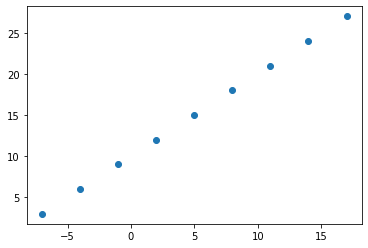

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create feature
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0])

# Visulize it 
plt.scatter(X, y)

## Regresion?

In [3]:
house_info = tf.constant([100, 4, 3, 1])

house_price = tf.constant([2345678])

In [4]:
house_info, house_price

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([100,   4,   3,   1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([2345678], dtype=int32)>)

In [5]:
input_shape = X[1].shape
input_shape

()

In [6]:
output_shape = y[0].shape
output_shape

()

## First neural network

1. **Creating a model**
2. **Compiling a model**
3. **Fitting a model**


* All the steps that you **can** change are called **hiperparameters**
* All the steps that you **cannot** change, are called **parameters**

In [7]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Creating a model (architecture) (Universal Approximation Theorem)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
]) 

# 2. Compile a model (Backpropagation) (hiperparameters)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 12.1497 - mae: 12.1497
Epoch 2/5
1/1 [==============================] - 0s 25ms/step - loss: 11.8897 - mae: 11.8897
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 11.6297 - mae: 11.6297
Epoch 4/5
1/1 [==============================] - 0s 26ms/step - loss: 11.3697 - mae: 11.3697
Epoch 5/5
1/1 [==============================] - 0s 23ms/step - loss: 11.1097 - mae: 11.1097


In [8]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14., 17.])

In [9]:
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.])

In [10]:
model.predict([17.0])

array([[13.991019]], dtype=float32)

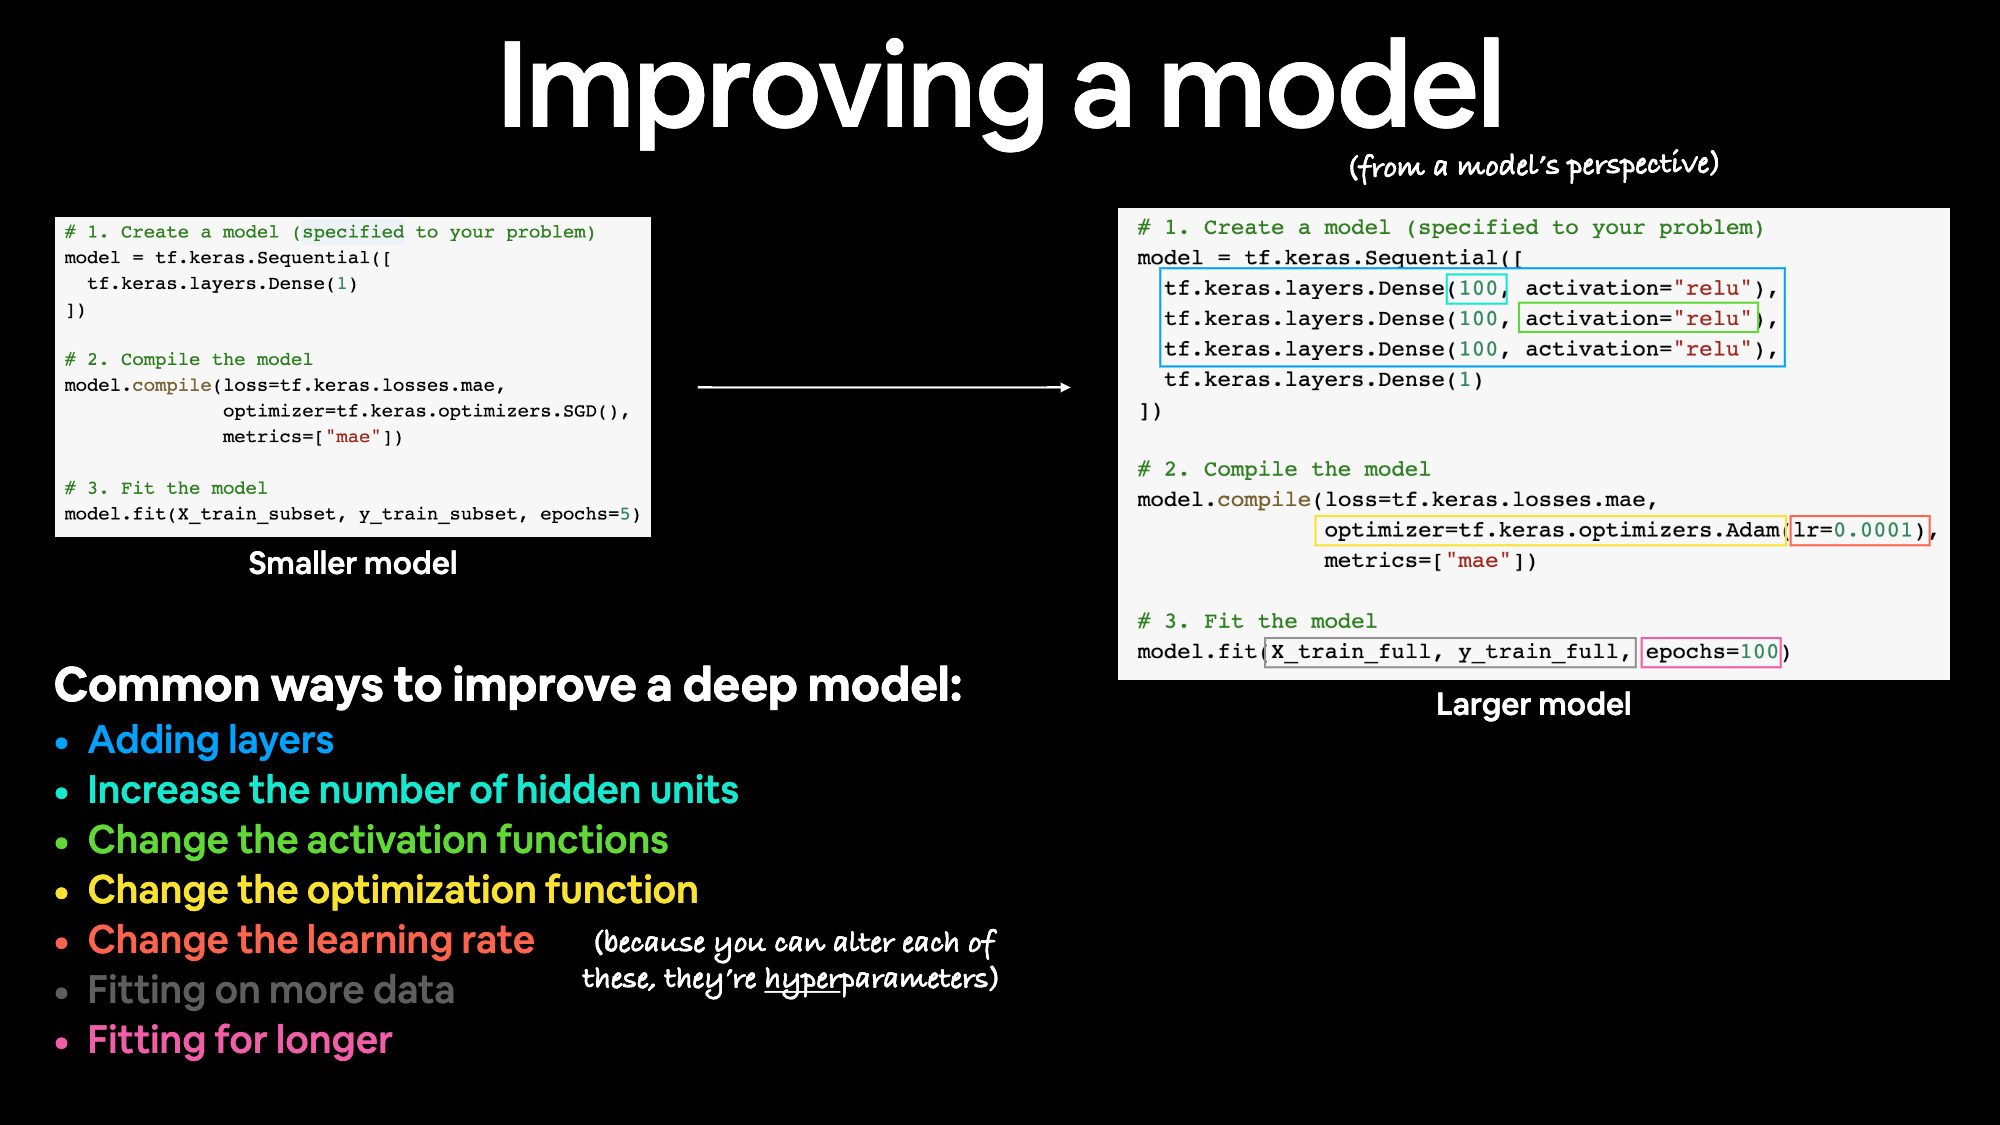

## Model 2

In [11]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 606ms/step - loss: 12.1497 - mae: 12.1497
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 11.8897 - mae: 11.8897
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 11.6297 - mae: 11.6297
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 11.3697 - mae: 11.3697
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 11.1097 - mae: 11.1097
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 10.8497 - mae: 10.8497
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 10.5897 - mae: 10.5897
Epoch 8/100
1/1 [==============================] - 0s 36ms/step - loss: 10.3297 - mae: 10.3297
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 10.0697 - mae: 10.0697
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 9.8097 - mae: 9.8097
Epoch 11/100
1/1 [==============================] 

In [12]:
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14., 17.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.]))

In [13]:
model_2.predict([10])

array([[17.280586]], dtype=float32)

## Splita data into training/test set

In [14]:
import numpy as np
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [15]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [16]:
len(X), len(y)

(50, 50)

In [17]:
# Our neural network will try to approximate this equation:
y_1 = X + 10
y_1

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [18]:
X_train = X[:40]
y_train = y[:40]

In [19]:
X_train, y_train

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66]))

In [20]:
X_test = X[40:]
y_test = y[40:]

In [21]:
X_test, y_test

(array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96]),
 array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [22]:
len(X_train), len(X_test)

(40, 10)

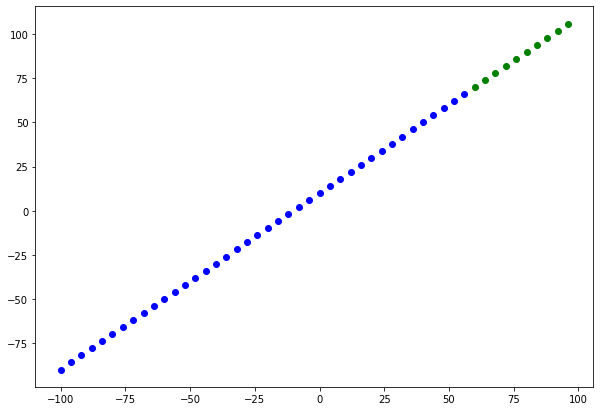

In [23]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Test data")

## Model 3

In [24]:
# 0. set random seed
tf.random.set_seed(42)

# 1. create model 
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

# 2 compile model
model_3.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])

# 3 fit the model
model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 20ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 33ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 22ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 21ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 19

In [25]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


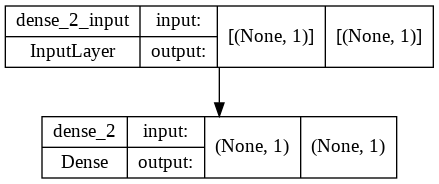

In [26]:
from tensorflow.keras.utils import plot_model

plot_model(model_3, show_shapes=True)

In [27]:
# X_test = exam
# y_preds = answer
y_preds = model.predict(X_test)

In [28]:
y_preds

array([[49.253597],
       [52.533836],
       [55.814075],
       [59.094315],
       [62.374557],
       [65.6548  ],
       [68.935036],
       [72.21528 ],
       [75.49552 ],
       [78.77576 ]], dtype=float32)

In [29]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [30]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_preds):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Test data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

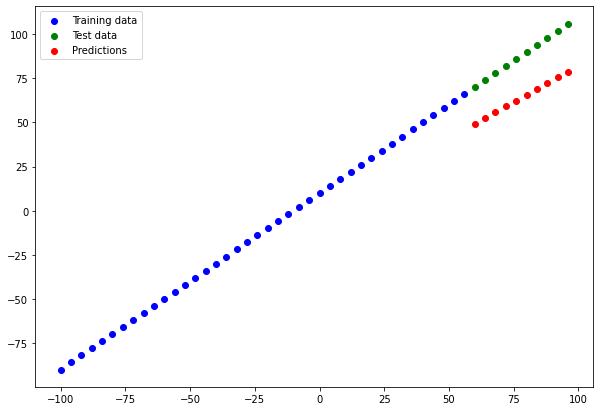

In [31]:
plot_prediction()

## Evaluating predictions

In [32]:
model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 374ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

* **Mean Absolute Error (MAE)** : the mean difference between each of the predictions
* **Mean Squared Error (MSE)**: the squared mean difference between each of the predictions (outliers)

Error metric is declared in `model.compile(loss,optimizer,metric)` in metric

In [33]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([38.746403, 35.466164, 32.185925, 28.905685, 25.625443, 22.3452  ,
       19.064964, 16.227777, 13.902687, 12.089697], dtype=float32)>

In [34]:
y_preds_3 = model.predict(X_test)

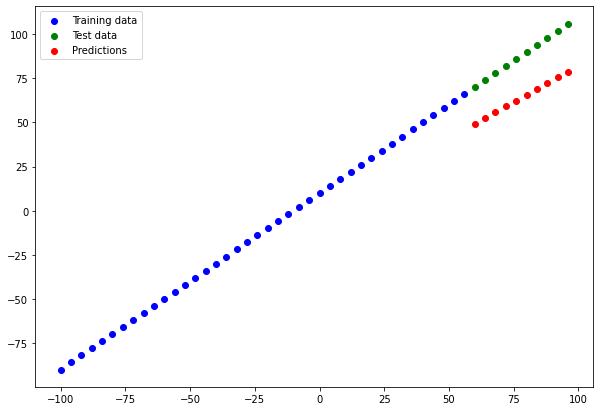

In [35]:
plot_prediction(X_train,
                y_train,
                X_test,
                y_test,
                y_preds_3)

In [36]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [37]:
# delete 1 
y_preds = y_preds.squeeze()

In [38]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=23.985325>

In [39]:
y_preds.shape

(10,)

# Model_4

In [40]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [41]:
y_preds_4 =model_4.predict(X_test)
y_preds_4

array([[ 69.4672  ],
       [ 73.985695],
       [ 78.50417 ],
       [ 83.02267 ],
       [ 87.541145],
       [ 92.05964 ],
       [ 96.57812 ],
       [101.0966  ],
       [105.61509 ],
       [110.133575]], dtype=float32)

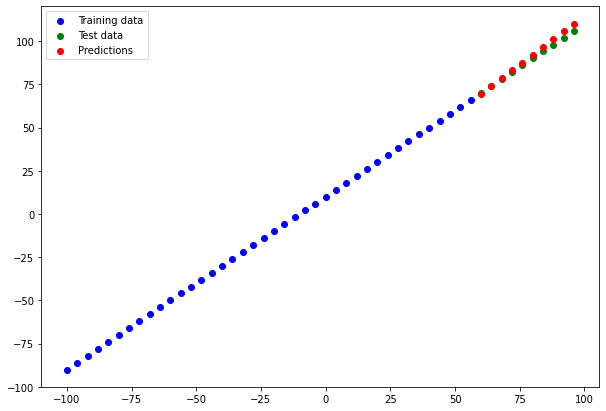

In [42]:
plot_prediction(predictions=y_preds_4)

In [43]:
full = []

for i in range(-100, 60, 4):
  pred = model_4.predict([i])
  full.append(pred)

In [44]:
full = np.squeeze(full)

In [45]:
X_train.shape, np.shape(full)

((40,), (40,))

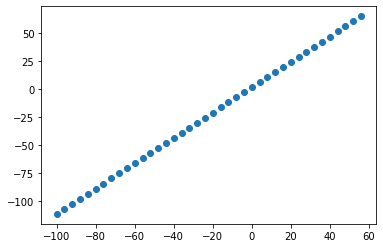

In [46]:
plt.scatter(X_train, full)

# `Model_5` More epoch does not mean more precision

In [47]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_5.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [48]:
y_preds_5 = model_5.predict([X_test])

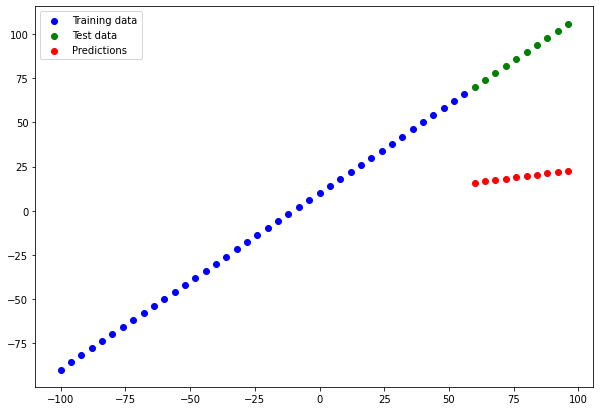

In [49]:
plot_prediction(predictions=y_preds_5)

## Evaluate models

In [50]:
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test, y_pred)

In [51]:
y_preds_2 = model_2.predict(X_test)

In [52]:
mae_1 = mae(y_test, y_preds.squeeze()).numpy
mse_1 = mse(y_test, y_preds.squeeze()).numpy

mae_2 = mae(y_test, y_preds_2.squeeze()).numpy
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy

mae_3 = mae(y_test, y_preds_3.squeeze()).numpy
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy

mae_4 = mae(y_test, y_preds_4.squeeze()).numpy
mse_4 = mse(y_test, y_preds_4.squeeze()).numpy

mae_5 = mae(y_test, y_preds_5.squeeze()).numpy
mse_5 = mse(y_test, y_preds_5.squeeze()).numpy

In [53]:
model_results = [["Model_1", mae_1, mse_1],
                 ["Model_2", mae_2, mse_2],
                 ["Model_3", mae_3, mse_3],
                 ["Model_4", mae_4, mse_4],
                 ["Model_5", mae_5, mse_5],]

In [54]:
mae_4, mse_4

(<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.9098114>>,
 <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=5.459232>>)

In [55]:
mae_1, mse_1

(<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=23.985325>>,
 <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=579.56964>>)

In [56]:
import pandas as pd

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,Model_1,<bound method _EagerTensorBase.numpy of <tf.Te...,<bound method _EagerTensorBase.numpy of <tf.Te...
1,Model_2,<bound method _EagerTensorBase.numpy of <tf.Te...,<bound method _EagerTensorBase.numpy of <tf.Te...
2,Model_3,<bound method _EagerTensorBase.numpy of <tf.Te...,<bound method _EagerTensorBase.numpy of <tf.Te...
3,Model_4,<bound method _EagerTensorBase.numpy of <tf.Te...,<bound method _EagerTensorBase.numpy of <tf.Te...
4,Model_5,<bound method _EagerTensorBase.numpy of <tf.Te...,<bound method _EagerTensorBase.numpy of <tf.Te...


In [57]:
model_4.predict([200])

array([[227.61418]], dtype=float32)

$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +\cdots +\beta_i X_i$

$y = 5.6 + 0.05 X_1 + 0.1 X_2 +\cdots - 4 X_i$

## Save model

In [58]:
model_4.save("best_model.h5")

In [59]:
loaded_model = tf.keras.models.load_model("best_model.h5")

In [60]:
loaded_model.predict([56])

array([[64.948715]], dtype=float32)

# A Larger Example

* `age`
* `sex`
* `bmi`
* `children`
* `smoking_status`
* `residential_region`

In [61]:
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

--2022-07-15 00:58:52--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.01s   

2022-07-15 00:58:52 (4.83 MB/s) - ‘insurance.csv’ saved [54288/54288]



In [62]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
insurance = pd.read_csv("insurance.csv")

In [66]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [68]:
insurance.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [69]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [71]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [72]:
insurance_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [74]:
X = insurance_one_hot.drop("charges", axis=1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [76]:
y = insurance_one_hot["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [77]:
len(X)

1338

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
len(X_train), len(X_test)

(1070, 268)

# Model 6

In [82]:
# 0. Set ranom seed
tf.random.set_seed(42)

# 1. Create model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile model
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
                metrics=["mae"])

# 3. Fit the model
model_6.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7859.4336 - mae: 7859.4336
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7578.0859 - mae: 7578.0859
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7514.6172 - mae: 7514.6172
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7694.1338 - mae: 7694.1338
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7595.9136 - mae: 7595.9136
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7735.9116 - mae: 7735.9116

In [83]:
model_6.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8628.2393 - mae: 8628.2393


[8628.2392578125, 8628.2392578125]

3 things:
* Increasing the number of layers (2->3)
* Increasing the number of units in each layer (except for the output layer)
* Changinf optimizer (from SGD -> ADAM)

# Model 7

In [88]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

# Compile model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history = model_7.fit(X_train, y_train, epochs=100, verbose=0)

In [89]:
model_7.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

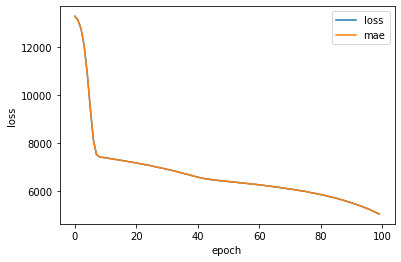

In [97]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch");

# Preprocessiing Data

## Normalization and standarization

* Tunning all of your data to numbers 
* Making sure 
* Feature scaling 
  * Normalization


In [98]:
insurance = pd.read_csv("insurance.csv")

In [100]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & Y 
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit ct to insurance
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [101]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [106]:
pd.DataFrame(X_train_normal[0])

,0
0,0.608696
1,0.107345
2,0.400000
3,1.000000
4,0.000000
5,1.000000
6,0.000000
7,0.000000
8,1.000000
9,0.000000


In [108]:
pd.DataFrame(X_train_normal)

,0,1,2,3,4,5,6,7,8,9,10
0,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.239440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.493947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.148238,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.000000,0.414044,0.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1066,0.456522,0.212806,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1067,0.869565,0.247915,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1068,0.413043,0.851224,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [105]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

# Model 8

In [114]:
# Set random seed
tf.random.set_seed(42)

# Build model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])


# Compile the model
model_8.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])


# Fit 
history_8 = model_8.fit(X_train_normal, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 2s 5ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/200
34/34 [==============================] - 0s 6ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 7ms/step - loss: 11925.96

In [115]:
model_8.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.5771 - mae: 3171.5771


[3171.5771484375, 3171.5771484375]

In [ ]:
model_8.predict([])